# Job 2 - Results analysis

In [ ]:
import os
import re
import pathlib

projectDir = str(pathlib.Path(os.getcwd()).parent.parent.parent)

outputDirPath = f"{projectDir}/output"
outputPath = f"{outputDirPath}/job2-output"
fileNameRegex = re.compile(r"part-\d{5}.*\.csv")

fileName = next(
  (f for f in os.listdir(outputPath) if fileNameRegex.match(f)),
  None
)
outputFilePath = f"{outputPath}/{fileName}"
print(outputFilePath)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

FILE_VER = "optimized" # "basic"
CSV_FILE = f"{projectDir}/full-output/job2-{FILE_VER}-results.csv"

# Load csv data
df = pd.read_csv(CSV_FILE)

df['year'] = df['year'].astype(int)
df['avg_rating'] = df['avg_rating'].astype(float)
price_mapping = {
    '*': 'Low',
    '**': 'Medium',
    '***': 'High',
    '****': 'Premium',
}
df['price'] = df['price']#.replace(price_mapping)

### 1. HEATMAP: States vs Prices


Dropdown(description='Category:', options=('ATM', 'ATV dealer', 'ATV repair shop', 'Abrasives supplier', 'Acup…

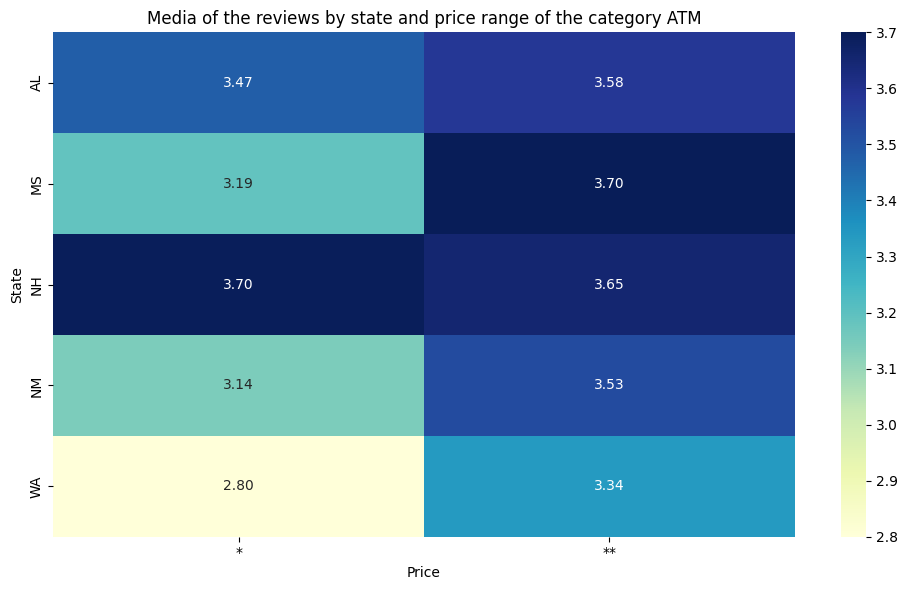

In [70]:
import ipywidgets as widgets
from IPython.display import display, clear_output

dropdown = widgets.Dropdown(
    options=df['category'].sort_values().unique().tolist(),
    description='Category:'
)

def update_heatmap(category):
  clear_output(wait=True)
  display(dropdown)
  plt.figure(figsize=(10, 6))
  cat_df = df[df['category'] == category]
  heatmap_data = cat_df.groupby(['state', 'price'])['avg_rating'].mean().unstack()
  sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
  plt.title(f'Media of the reviews by state and price range of the category {category}')
  plt.xlabel('Price')
  plt.ylabel('State')
  plt.tight_layout()
  plt.show()

dropdown.observe(lambda change: update_heatmap(change['new']), names='value')
update_heatmap(dropdown.value)

### GRAFICO 2: Andamento temporale


/var/folders/z3/343chccx7vv57qdqm1y6q9f00000gn/T/ipykernel_96782/2271785329.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/teo/Universita/Magistrale/BIG_DATA/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


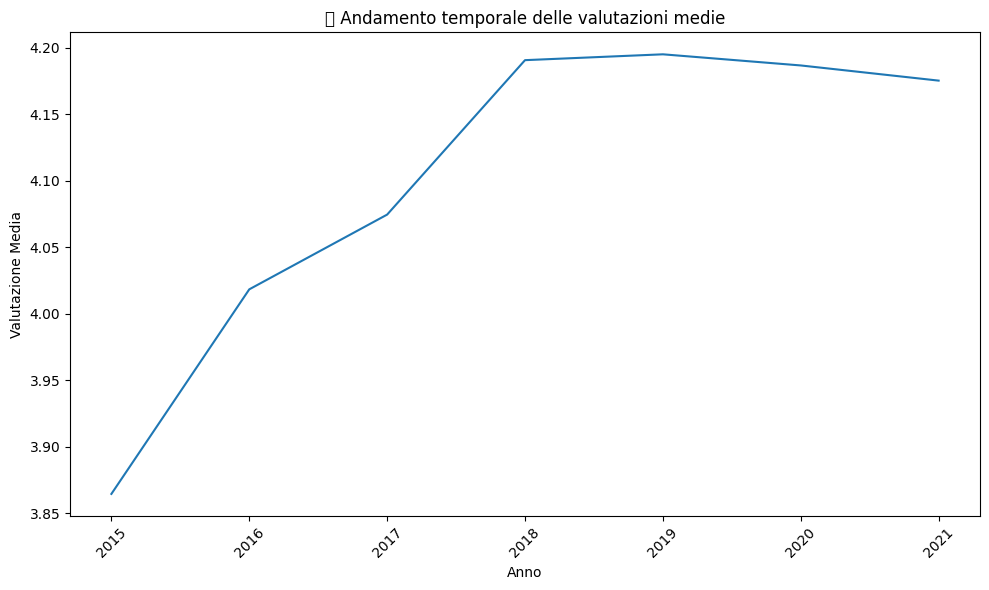

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='avg_rating', estimator='mean', errorbar=None)
plt.title('Andamento temporale delle valutazioni medie')
plt.ylabel('Valutazione Media')
plt.xlabel('Anno')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### GRAFICO 3: Boxplot per fascia di prezzo

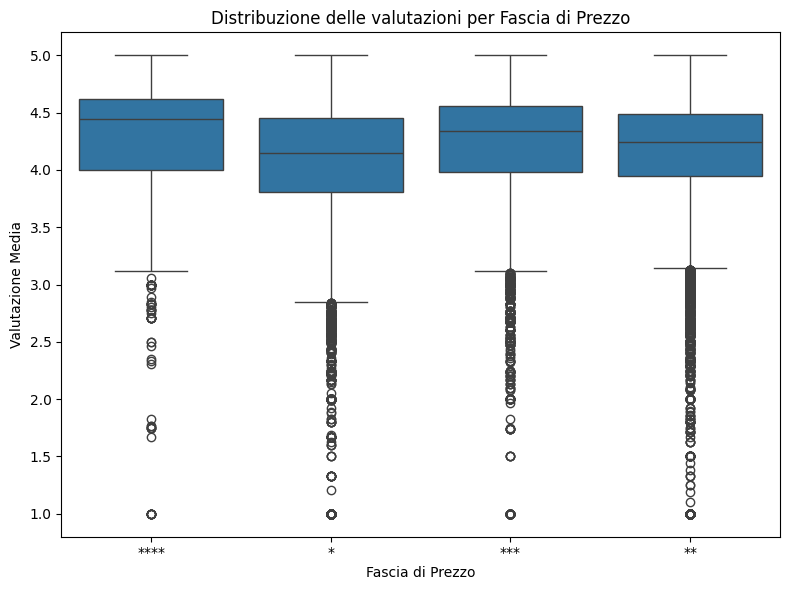

In [65]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='price', y='avg_rating')
plt.title('Distribuzione delle valutazioni per Fascia di Prezzo')
plt.xlabel('Fascia di Prezzo')
plt.ylabel('Valutazione Media')
plt.tight_layout()
plt.show()

### 4. CHOROPLETH MAP: Average Rating by State
Shows in which state of the USA the selected business category has the highest average reviews.

In [69]:
import ipywidgets as widgets
from IPython.display import display, clear_output

dropdown = widgets.Dropdown(
    options=df['category'].sort_values().unique().tolist(),
    description='Category:'
)

def update_heatmap(category):
    clear_output(wait=True)
    display(dropdown)
    cat_df = df[df['category'] == category]
    state_avg = cat_df.groupby(['state'], as_index=False)['avg_rating'].mean()
    fig = px.choropleth(
        state_avg,
        locations='state',
        locationmode='USA-states',
        color='avg_rating',
        color_continuous_scale='RdYlGn',
        scope='usa',
        title='Average evaluation by state'
    )
    fig.show()

dropdown.observe(lambda change: update_heatmap(change['new']), names='value')
update_heatmap(dropdown.value)

Dropdown(description='Category:', options=('ATM', 'ATV dealer', 'ATV repair shop', 'Abrasives supplier', 'Acup…